# 파이썬 머신러닝 완벽가이드 - part4

#### sklearn을 중심으로 python에서 ML을 다루는 과정에 대해 정리하였습니다.
#### Python 3.7 버전에서 작성되었으며, 파이썬 머신러닝 완벽 가이드(권철민 지음)을 참고하여 작성하였습니다.

## 4. 분류 
### 4.1 분류의 개요 
#### - 나이브 베이즈 : 베이즈 통계와 생성 모델에 기반
#### - 로지스틱 회귀 : 독립변수와 종속변수의 선형 관계성에 기반
#### - 결정 트리 : 데이터 균일도에 따른 규칙 기반
#### - 서포트 벡터 머신 : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
#### - 최소 근접 알고리즘 : 근접 거리를 기준
#### - 신경망 : 심층 연결 기반
#### - 앙상블 : 서로 다른(같은) 머신러닝 알고리즘의 결합
#### - 이미지, 영상, 음성, 자연어처리에서는 신경망에 기반한 딥러닝이 머신러닝계를 선도, 하지만 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 많이 이용
#### - 앙상블은 배깅과 부스팅으로 나뉨 -> 배깅 : 랜덤 포레스트가 대표적 / 부스팅 : 그래디언트 부스팅, XgBoost, LightGBM
#### - 앙상블은 매우 많은 여러개의 약한 학습기(예측 성능이 떨어지는 학습기)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 업데이트 하면서 예측 성능을 향상시키는데 이때 결정 트리가 약한 학습기 역할을 함

### 4.2 결정 트리 
#### - 데이터의 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 수행 
#### - 규칙노드 : 규칙 조건이 되는 것 / 리프노드 : 결정된 클래스 값 / 서브트리 : 새로운 규칙 조건마다 생성 
#### - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
#### - 정보의 균일도 측정 방법 : 엔트포리를 이용한 정보이득 / 지니 계수
#### - 정보이득 : 엔트로피 개념 기반 / 정보이득 = 1 - 엔트로피 / 정보 이득이 높은 속성을 기준으로 분할 = 혼잡도가 낮은 기준으로 분할
#### - 지니 계수 : 불평등 지수 / 0기 가장 평등 , 1이 가장 불평등 / 지니 계수가 낮을 수록 균일도가 높음 / 지니계수 낮은 속성으로 분할
#### 4.2.1 결정 트리 모델의 특징 
#### - 장점 : '균일도'라는 룰을 기반으로 하여 알고리즘이 쉽고 직관적 / 피처의 스케일링과 정규화 같은 전처리 필요 없음
#### - 단점 : 과적합 / 낮은 정확도

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

dt_clf.fit(X_train, y_train)

# from sklearn.tree import export_graphviz
# export_graphviz(dt_clf, out_file = "tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names,
#                impurity=True, filled=True)

# import graphviz
# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

DecisionTreeClassifier(random_state=156)

#### - mac에서 graphviz 사용법을 찾지 못함 
#### - Graphviz 부분 생략
#### - DecisionTreeClassifier 객체의 feature_importances_ 속성으로 피처의 중요도 확인

Feature importances: \[0.025 0.    0.555 0.42 ]
-------------------------------------------------------------
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420
-------------------------------------------------------------


<AxesSubplot:>

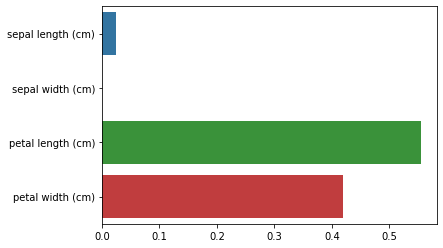

In [2]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances: \{0}".format(np.round(dt_clf.feature_importances_, 3)))
print("-------------------------------------------------------------")

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
print("-------------------------------------------------------------")

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)


#### 4.2.2 결정트리 과적합(overfitting)

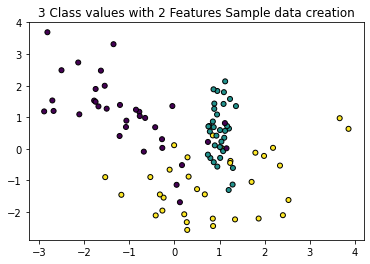

In [3]:
# make_classification - 분류를 위한 테스트 데이터를 쉽게 만들어줌
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, 
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s=25, edgecolor = 'k')

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

#### 4.2.3 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv("human_activity/features.txt", sep = '\s+', header = None, 
                              names = ['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])
print("-------------------------------------------------")

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']
-------------------------------------------------


In [5]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
print("-------------------------------------------------")
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64
-------------------------------------------------


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [6]:
# 중복된 피처명에 대해서 원본 피처명에 _1, _2를 추가로 부여해 새로운 피처명을 가지게 하는 df 생성
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                              if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [7]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt', sep = '\s+', header = None, 
                                 names = ['columns_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep = '\s+', header = None, names = feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep = '\s+', header = None, names = feature_name)
    
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

print('## 학습 피처 데이터셋 info()')
print("-------------------------------------------------")
print(X_train.info())
print("-------------------------------------------------")
print(y_train['action'].value_counts())
print("-------------------------------------------------")

## 학습 피처 데이터셋 info()
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
-------------------------------------------------
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64
-------------------------------------------------


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))
print("-------------------------------------------------")

print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())
print("-------------------------------------------------")

결정 트리 예측 정확도 : 0.8548
-------------------------------------------------
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}
-------------------------------------------------


In [9]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print("-------------------------------------------------")
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)
print("-------------------------------------------------")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513
-------------------------------------------------
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 16}
-------------------------------------------------


In [10]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [11]:
max_depths = [6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))
    print("-------------------------------------------------")

max_depth = 6 정확도 : 0.8558
-------------------------------------------------
max_depth = 8 정확도 : 0.8707
-------------------------------------------------
max_depth = 10 정확도 : 0.8673
-------------------------------------------------
max_depth = 12 정확도 : 0.8646
-------------------------------------------------
max_depth = 16 정확도 : 0.8575
-------------------------------------------------
max_depth = 20 정확도 : 0.8548
-------------------------------------------------
max_depth = 24 정확도 : 0.8548
-------------------------------------------------


In [12]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print("-------------------------------------------------")
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)
print("-------------------------------------------------")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
-------------------------------------------------
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}
-------------------------------------------------


In [13]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))
print("-------------------------------------------------")

결정 트리 예측 정확도 : 0.8717
-------------------------------------------------


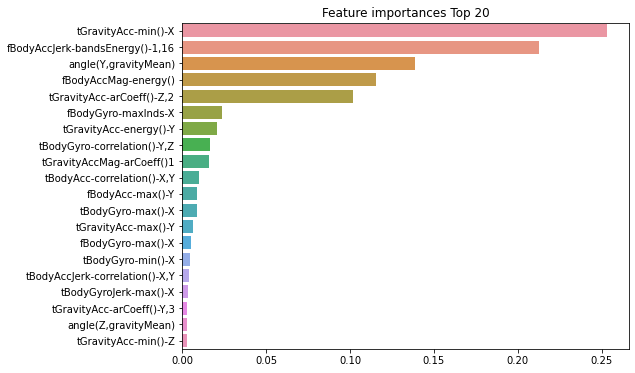

In [14]:
import seaborn as sns
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

### 4.3 앙상블 학습
#### 4.3.1 앙상블 학습 개요
#### - 앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법
#### - 앙상블 알고리즘의 대표 : 랜덤 포레스트 / 그래디언트 부스팅
#### - 보팅 : 서로 다른 알고리즘을 가진 분류기를 결합
#### - 배깅 : 각각의 분류리가 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가여 학습을 수행 / 랜덤 포레스트
#### - 부스팅 : 여러 개의 분류리가 순차적으로 학습, 앞에서 학습한 분류리가 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 분류기에는 가중치를 부여하여 학습과 예측 진행 / 그래디언트 부스팅, XGBoost, LightGBM
#### - 스태킹 : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측

#### 4.3.2 보팅 유형 - 하드보팅과 소프트보팅
#### - 하드 보팅 : 다수결 원칙, 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
#### - 소프트 보팅 : 레이블 값 결정 확률을 모두 더하고 이를 평균해서 확률이 가장 높은 레이블 값을 최종 결괏값으로 선정 / 일반적으로 사용

#### 4.3.3 보팅 분류기 

In [15]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [16]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)) )

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


### 4.4 랜덤 포레스트 
#### 4.4.1 랜덤 포레스트의 개요 및 실습
#### - 랜덤 포레스트는 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보인다. 
#### - 부트스트랩 : 여러 개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))
print("-------------------------------------------------")

랜덤 포레스트 정확도 : 0.9253
-------------------------------------------------


In [18]:
from sklearn.model_selection import GridSearchCV

parms = {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs = 1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print("-------------------------------------------------")
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))
print("-------------------------------------------------")

최적 하이퍼 파라미터 : 
 {'max_depth': 20, 'min_samples_split': 16}
-------------------------------------------------
최고 예측 정확도 : 0.9132
-------------------------------------------------


In [19]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))
print("-------------------------------------------------")

예측 정확도 : 0.9165
-------------------------------------------------


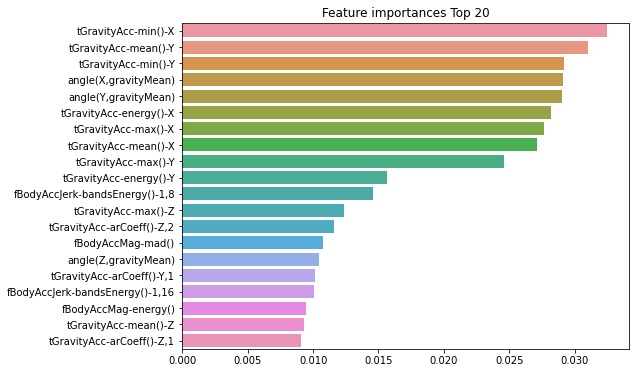

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### 4.5 GBM(Gradient Boosting Machin)
#### 4.5.1 GBM의 개요 및 실습 
#### - 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 가며 학습
#### - AdaBoost : 오류 데이터에 가중치를 부여하면서 부스팅을 수행
#### - GBM : 가중치 업데이트를 경사 하강법을 이용

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('----------------------------------------------------')
print('GBM 수행 시간 : {0:.1f} 초'.format(time.time() - start_time))
print('----------------------------------------------------')

#### - GBM은 성능이 좋으나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 필요

#### 4.5.2 GBM 하이퍼 파라미터 및 튜닝
#### - loss
#### - learning_rate
#### - n_estimators : weak learner의 개수
#### - subsample : weak learner가 학습에 사용하는 뎅터의 샘플링 비율

### 4.6 XGBoost(eXtra Gradient Boost) - window로 정리 필요
#### 4.6.1 XGBoost 개요
#### - 트리 기반 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
#### - GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결
#### - 병렬 CPU 환경에서 병렬 학습이 가능 
#### - mac m1에서 설치가 잘 안됨

### 4.7 LightGBM - window로 정리 필요
#### - XGBoost에서 GridSearchCV로 하이퍼 파라미터 튜닝을 수행하면 수행 시간이 너무 오래 걸려 많은 파라미터 튜닝하기에 어려움을 겪음
#### - LightBGM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점이다. / 메모리 사용량도 적음
#### - 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬운 단점이 존재 
#### - 리프 중심 트리 분할 방식을 사용 / 트리의 균형을 맞추지 않고, 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하여 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성 / 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있음
#### - mac m1에서 설치가 잘 안됨

### 4.8 분류 실습 - 캐글 산탄데르 고객 만족 예측 - window로 정리 필요

### 4.9 분류 실습 - 캐글 신용카드 사기 검출 - window로 정리 필요

### 4.10 스태킹 앙상블 
#### - 스태킹은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅과 부스팅과 공통점을 지님
#### - 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행
#### - 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행(메타 모델)
#### - 2가지 종류의 모델이 필요 : 1. 개별적인 기반 모델 / 2. 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델
#### - 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것이 핵심

#### 4.10.1 기본 스태킹 모델

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_data = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [14]:
# 개별 모델 : KNN, 랜덤 포레스트, 결정 트리, 에이다 부스트 4)
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 모델 : 로지스틱 회귀

lr_final = LogisticRegression(C = 10)

In [15]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [16]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('-------------------------------------------------------------------')
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('-------------------------------------------------------------------')
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('-------------------------------------------------------------------')
print('에이다부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('-------------------------------------------------------------------')

KNN 정확도 : 0.9211
-------------------------------------------------------------------
랜덤 포레스트 정확도 : 0.9649
-------------------------------------------------------------------
결정 트리 정확도 : 0.9035
-------------------------------------------------------------------
에이다부스트 정확도 : 0.9561
-------------------------------------------------------------------


In [17]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)
print('-------------------------------------------------------------------')

pred = np.transpose(pred)
print(pred.shape)
print('-------------------------------------------------------------------')

(4, 114)
-------------------------------------------------------------------
(114, 4)
-------------------------------------------------------------------


In [18]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.9649


#### 4.10.2 CV 세트 기반의 스태킹
#### - 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기바으로 예측된 결과 데이터 세트를 이용
#### - 최종 모델에서 최종 학습을 할 때 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 뎅터 세트를 기반으로 학습했기에 과적합 문제가 발생할 수 있음
#### - CV 세트 기반의 스태킹은 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 메타 모델이 학습과 예측을 수행

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle = True, random_state = 0)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    return train_fold_pred, test_pred_mean

In [30]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [31]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis = 1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis = 1)
print('원본 학습 피처 데이터 Shape : ', X_train.shape, '원본 테스트 피처 Shape : ', X_test.shape)
print("----------------------------------------------------")
print('스태킹 학습 피처 데이터 Shape : ', Stack_final_X_train.shape, '스태킹 테스트 피처 Shape : ', Stack_final_X_test.shape)
print("----------------------------------------------------")

원본 학습 피처 데이터 Shape :  (455, 30) 원본 테스트 피처 Shape :  (114, 30)
----------------------------------------------------
스태킹 학습 피처 데이터 Shape :  (455, 4) 스태킹 테스트 피처 Shape :  (114, 4)
----------------------------------------------------


In [32]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도 : 0.9649
